In [54]:
#Loading required libraries
import os
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

from keras import losses
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from keras.optimizers import Adam
from keras import optimizers
from keras import backend as K
from keras.callbacks import Callback
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers


import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import tensorflow as tf
import pickle

from pylab import rcParams



In [55]:
#Loading train data
train=pd.read_csv("../input/exercise_02_train.csv")


Data Exploration

In [56]:
#Data
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,1.148618,-3.043351,-3.896558,2.170615,6.366298,-7.340866,0.267735,1.081311,-15.236885,1.159306,-27.961682,11.829013,43.295583,-0.880307,-4.518688,3.271091,0.103514,31.646894,2.901849,-0.163627,-2.131994,-8.460728,-2.411500,-7.350110,Toyota,wed,1.423590,-10.839200,-3.366516,15.494000,...,14.791115,-4.087323,4.036426,-1.533861,1.261707,59.935463,0.643823,Jun,-31.391165,41.040206,8.616496,9.529082,-18.001886,-5.775643,40.617107,1.965695,-50.663141,4.554055,-7.495833,-46.690744,6.481538,4.635831,1.885149,0.784681,0.556071,-0.103677,11.068765,-1.405188,-1.960280,-155.442237,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,-75.745489,4.817071,11.744015,1.379990,6.226372,0.042640,2.354558,-8.940383,19.741290,17.559436,9.841718,-12.457077,15.719526,8.212825,1.067061,7.119592,-0.009653,-45.402701,-3.751504,-1.451099,2.133355,-6.947286,-1.789253,2.620869,Honda,wed,1.662058,57.917006,-5.124272,6.240581,...,4.511355,3.297596,-4.809269,12.176704,0.395125,-42.651072,-3.473815,sept.,8.681870,36.204784,-25.515410,-3.703719,16.169398,-44.023601,-49.303165,0.727415,-17.648950,6.011168,-15.538136,-20.116032,4.061026,1.386698,-0.333381,2.069130,5.047461,-0.702813,3.512072,4.240518,7.242614,-73.365593,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,0.880971,-6.172156,-19.037250,-2.960048,-2.891082,1.261521,-1.797489,-0.614719,25.529246,22.418811,7.281959,51.966010,-10.832756,-0.945138,-0.246806,0.366805,0.524702,-7.127528,-1.176779,0.618480,-0.976925,1.285019,-4.361560,-5.322576,bmw,wed,0.472357,-12.991058,-5.436794,-11.649682,...,1.007183,-2.416567,16.889265,-7.112369,0.256450,-9.555651,3.430571,Oct,31.141879,49.538602,17.438890,2.269528,-24.340106,-29.972499,-19.706659,-10.026766,-30.165994,0.671222,-6.744114,24.297364,3.199586,-3.318213,9.341546,-12.252531,-19.567739,0.683658,3.371148,2.423319,1.740493,-23.433184,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,27.643905,7.390939,20.819180,6.128592,1.510900,-8.126781,2.058786,5.796101,53.029270,-16.178983,13.823307,30.155518,12.922670,6.564312,2.556431,-5.940073,0.393260,18.953604,-6.196459,-1.268807,-7.715012,-1.103812,-0.798582,0.373065,volkswagon,wed,-0.092740,37.658926,5.675375,10.521885,...,-12.910941,-1.567731,-21.680531,0.037226,-1.000424,18.549158,-0.035583,Jun,-13.934322,82.130387,-2.441103,-3.410051,-2.048109,-7.937655,-7.301283,-4.535142,11.973215,-3.862757,2.380532,-12.296316,-6.108567,5.669739,-2.007231,2.362671,2.984405,-0.290280,6.938667,-3.665965,-1.724591,38.547680,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,-15.623899,-1.847208,-22.060657,-1.701010,4.273573,-5.610306,2.768667,-3.690564,1.107321,-13.783970,-4.636736,-10.493426,-21.019953,-3.156979,-1.597321,1.542110,-0.512446,34.803378,3.865391,-0.692889,1.122795,-9.951829,0.567036,6.767094,volkswagon,thurday,-1.798863,-59.497091,-2.113214,9.955583,...,0.330000,-9.296293,3.210319,-1.125527,-2.050232,-29.846088,-2.175149,July,57.851566,-19.154066,25.603477,-5.134321,-23.924702,-1.580576,-2.751656,7.923341,10.102275,-0.358830,27.283886,-13.035870,-3.081276,-1.623730,-0.546353,3.25

In [57]:
#Shape of data
train.shape

(40000, 101)

In [58]:
#Exploring missing values
train.isnull().sum()[train.isnull().sum() !=0]

x0     11
x1     10
x2      8
x3      9
x4      8
x5      6
x6     10
x7      9
x8      6
x9      7
x10     9
x11     7
x12    11
x13    14
x14     3
x15     4
x16     7
x17    12
x18    14
x19     8
x20     5
x21    13
x22     6
x23     8
x24    14
x25    11
x26     9
x27     8
x28    11
x29     5
       ..
x70     5
x71     5
x72     8
x73    12
x74     7
x75    10
x76    10
x77     9
x78     7
x79     6
x80     9
x81     4
x82     8
x83     5
x84     3
x85    14
x86    11
x87     4
x88     4
x89    11
x90     7
x91     4
x92     7
x93     7
x94     8
x95     8
x96    15
x97    13
x98     6
x99    13
Length: 100, dtype: int64

,features,missing_count,missing_count_percentage
0,x0,11,0.0275
1,x1,10,0.0250
2,x2,8,0.0200
3,x3,9,0.0225
4,x4,8,0.0200
5,x5,6,0.0150
6,x6,10,0.0250
7,x7,9,0.0225
8,x8,6,0.0150
9,x9,7,0.0175


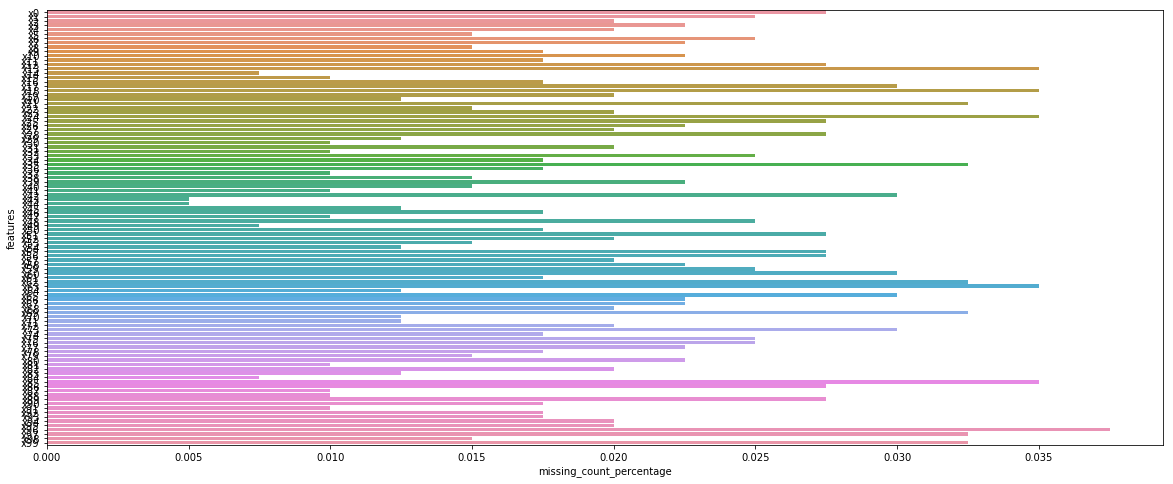

In [59]:
#Exploring missing values
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/40000)*100
plt.figure(figsize=(20,8))
sns.barplot(y=train_missing['features'],x=train_missing['missing_count_percentage'])
train_missing

In [80]:
#checking data types
train.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('uint8')], dtype=object)

In [ ]:
# CATEGORICAL COLUMNS
train.loc[:,train.dtypes==object].head()

Data Pre-processing

In [62]:
# Remove the $ symbol
train['x41'] = train['x41'].str.replace('$','').astype(float)

In [63]:
#Remove the % symbol
train['x45'] = train['x45'].str.replace('%','').astype(float)

In [64]:
train.loc[:,train.dtypes==object].head()

,x34,x35,x68,x93
0,Toyota,wed,Jun,asia
1,Honda,wed,sept.,asia
2,bmw,wed,Oct,america
3,volkswagon,wed,Jun,asia
4,volkswagon,thurday,July,asia


1.Missing value Treatment

,features,missing_count,missing_count_percentage
0,x0,11,0.0275
1,x1,10,0.0250
2,x2,8,0.0200
3,x3,9,0.0225
4,x4,8,0.0200
5,x5,6,0.0150
6,x6,10,0.0250
7,x7,9,0.0225
8,x8,6,0.0150
9,x9,7,0.0175


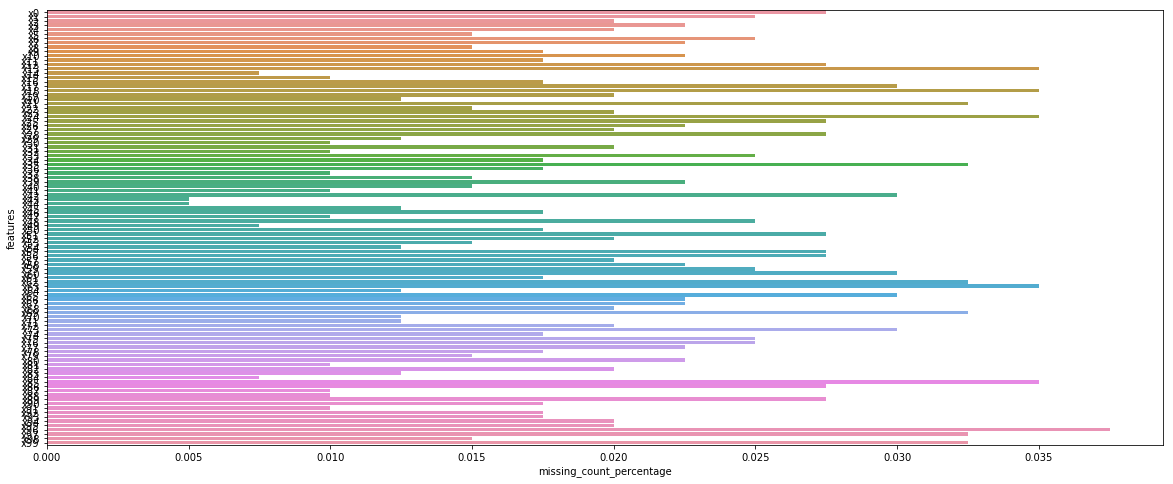

In [65]:
# missing values
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/40000)*100
plt.figure(figsize=(20,8))
sns.barplot(y=train_missing['features'],x=train_missing['missing_count_percentage'])
train_missing

In [66]:
#As percentage of missing values are very less,so Dropping rows with missing data
train.dropna(how='any', inplace=True)

In [67]:
#missing values AGAIN
train[train.isnull().any(axis=1)].shape

(0, 101)

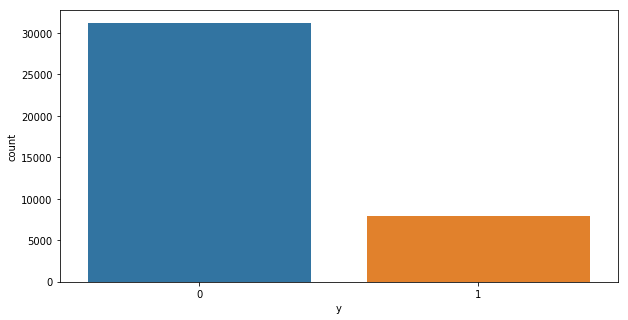

In [68]:
#Responce varaible
aixs1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='y',data=train)

2.Categorical varaible transformation

In [69]:
#One-hot Encoding
train = pd.get_dummies(train, columns=['x34', 'x35', 'x68', 'x93'])

Modelling

1)Dataset split

In [70]:
#Dataset split
train_data, test_data = train_test_split(train, test_size = 0.15)
print(train_data.shape)
print(test_data.shape)

(33304, 130)
(5878, 130)


In [71]:
#traindata
train_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,...,x94,x95,x96,x97,x98,x99,y,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_fri,x35_friday,x35_monday,x35_thur,x35_thurday,x35_tuesday,x35_wed,x35_wednesday,x68_Apr,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe
37846,-2.411561,-61.742111,-16.748740,-1.290759,22.446874,-18.803426,10.531569,3.827918,21.711334,0.589186,29.324467,-3.750856,-14.644346,-7.231462,1.650925,-4.862121,-1.012438,-10.400483,-8.966719,11.949508,31.636973,-5.498704,-11.738725,-3.099522,1.852628,-1.168439,-0.428983,0.637321,-0.226425,1.889982,1.053941,-3.195602,-0.173784,-2.812548,0.794767,47.582018,-1.232154,16.963879,-54.502703,-139.45,...,1.275693,17.212854,-40.708493,-8.236265,2.950316,-0.510444,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
16352,-18.132407,49.902177,-55.891453,-0.625926,15.794935,4.085742,-3.778877,0.480463,-7.703640,0.915806,-20.678443,-0.800882,-1.848493,-1.904555,-1.291042,2.061118,3.129572,-0.279969,23.032181,1.903025,-6.016226,-34.818848,-28.467683,-9.545098,-2.903890,-3.284496,0.847603,28.177322,1.486834,0.969098,-5.603480,0.817626,-1.420785,-1.550061,-0.342217,27.417334,8.681608,-3.484508,24.155627,803.61,...,-2.547518,10.456308,31.688425,3.279799,-1.106224,-0.345977,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
33914,6.234869,-12.140939,47.619465,-0.041688,21.283734,4.278229,11.346257,3.976602,-4.583926,8.394282,-6.781552,1.170635,33.047198,0.041622,8.006893,14.409779,0.814240,9.783107,1.235397,7.396770,8.361040,29.122772,-7.655483,6.922171,-2.779436,5.617777,-0.640634,85.280207,-1.082530,-0.581233,3.640943,2.173697,2.433681,-0.085598,1.023692,-0.927468,-0.894647,12.417752,9.561594,754.12,...,0.723524,-7.460728,-14.229808,3.586998,-8.205904,-0.240545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
19579,-12.616562,22.125082,62.232174,-0.039762,-5.976402,15.304443,5.994113,13.160565,-29.657740,-1.451726,24.934642,-5.458728,-7.668337,1.085162,5.719275,0.117203,-3.308146,-6.853193,34.289277,13.521889,1.799211,-11.005742,10.483278,8.397983,-4.164375,-0.447333,0.259460,11.173054,-2.895547,0.551103,-1.857855,5.569036,3.231171,2.338194,-1.499260,18.909813,11.660076,6.827700,-26.675626,-124.58,...,-2.316821,-42.095808,26.627541,-9.341151,10.790769,0.297923,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14404,9.856943,-31.919943,72.435879,-0.688350,13.404473,-3.835442,-11.253772,-7.631260,2.962574,-2.818451,29.203897,-7.440081,-12.089063,-4.182323,-5.435570,-5.062387,2.067994,1.169229,6.224064,-34.095003,4.621551,42.843185,-29.043478,1.131361,-1.469580,-7.885343,-0.100501,29.527334,2.203569,0.252282,-0.994303,0.062990,-0.986068,2.339867,2.567283,-28.568079,11.259378,16.815711,-15.388547,-884.74,...,3.371492,-44.583426,8.302434,21.297317,-4.048841,-0.823430,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
#traindata
test_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,...,x94,x95,x96,x97,x98,x99,y,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_fri,x35_friday,x35_monday,x35_thur,x35_thurday,x35_tuesday,x35_wed,x35_wednesday,x68_Apr,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe
594,12.121307,-44.004453,39.792635,0.259757,4.324335,-4.667347,12.885150,-4.094039,11.652114,-3.429173,-29.137853,-1.469380,-7.269383,1.043400,0.822785,-4.560471,-1.202287,5.665248,44.639501,19.614119,-16.882109,48.011351,103.443452,12.183999,-2.575211,-2.869482,-0.489927,-41.463687,0.733768,1.164212,-3.218790,-1.906399,0.069126,3.165438,-2.011345,29.454293,6.242626,-3.592994,-9.529745,810.40,...,1.629449,-50.558703,-27.028059,-1.103066,-13.654683,-0.748193,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
33752,-4.767085,36.996197,-11.031441,-0.230155,-11.030415,0.719983,0.593748,1.536063,8.721217,-2.083390,1.330274,-2.675923,-10.734500,-1.872974,2.120149,-2.609695,-5.694407,3.337620,14.285770,-28.872343,-0.117654,39.167947,-13.718691,3.423649,1.729606,3.675565,0.160634,41.498199,-6.210096,-0.088986,3.232886,9.336233,-2.160215,5.325725,-0.046036,10.594477,0.555437,-1.938194,-0.794243,-963.13,...,-2.111073,-12.550781,-8.162780,2.378029,12.679759,1.768222,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
32983,27.462736,-17.313190,30.330753,-1.390311,-36.086301,9.383551,-4.388210,-5.897889,-2.568534,3.331204,53.515494,-2.708940,-17.357392,-2.481854,0.047698,3.169533,-3.695776,-7.517403,30.715898,-2.151503,-12.090267,2.922776,-25.701154,6.169358,-0.727997,-2.338916,0.900841,14.513211,4.259788,0.350732,2.502930,7.749195,1.087769,-4.536614,0.381591,-54.736239,-3.400354,5.246052,-39.866045,514.18,...,-1.591438,-5.091216,10.222721,-5.983624,-4.226460,1.637602,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
36486,25.928648,-30.097749,117.964701,-0.790392,4.627003,12.577056,-1.449299,-4.238729,7.456353,5.769824,62.055473,0.163030,-1.253569,0.290045,-2.059189,1.639480,-0.884598,-5.334815,-14.870429,-17.026411,12.455060,37.642523,71.921826,5.621208,-4.247802,6.604696,-0.291573,85.488833,2.123628,-0.793164,0.097582,-6.634365,-0.491092,-1.001691,-0.535255,-8.733346,-6.537675,-13.877048,-20.245669,1151.56,...,-0.824759,2.620817,-22.701697,-18.078267,6.556903,-0.852853,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
33375,11.349197,-35.204423,-32.129465,0.379993,-12.743053,-23.870712,-3.498592,11.095625,-12.377169,-1.745031,8.411824,2.505587,-18.509164,1.576660,-0.757873,15.930893,3.026224,-0.865809,-4.019274,-25.725686,-16.576653,-14.699021,5.508078,3.939781,-0.903236,3.095719,1.204059,59.292031,1.561903,0.662970,-1.427022,3.494757,1.939965,0.986457,0.157307,15.344642,4.362243,-0.581265,-19.615046,851.87,...,2.717534,13.539499,7.826862,15.867514,0.715044,-0.196146,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
#Predictor and responce variables
train_x = train_data.drop(['y'], axis=1)
train_y = train_data['y']
test_x = test_data.drop(['y'], axis=1)
test_y = test_data['y']
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(33304, 129)
(33304,)
(5878, 129)
(5878,)


2)Normalization

In [74]:
#Function for normalization
def normalization(data):
    return (data - data.min())/(data.max() - data.min())

In [75]:
#normalizing data
train_x = normalization(train_x)
test_x = normalization(test_x)

In [76]:
#traindata
train_x.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,...,x92,x94,x95,x96,x97,x98,x99,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_fri,x35_friday,x35_monday,x35_thur,x35_thurday,x35_tuesday,x35_wed,x35_wednesday,x68_Apr,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe
37846,0.426082,0.307580,0.461863,0.411589,0.664128,0.348606,0.569088,0.501023,0.625220,0.530827,0.585675,0.404110,0.428631,0.168802,0.564162,0.379731,0.513529,0.300550,0.448387,0.575443,0.703539,0.462897,0.465019,0.490060,0.492639,0.431301,0.414670,0.456053,0.500681,0.742852,0.548853,0.441832,0.455098,0.392194,0.544808,0.688336,0.488773,0.710693,0.257808,0.518439,...,0.832152,0.575829,0.607797,0.336474,0.437732,0.551350,0.436026,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16352,0.309997,0.666784,0.338537,0.466468,0.611585,0.529930,0.390463,0.446150,0.381462,0.545172,0.439170,0.488682,0.514704,0.418969,0.448931,0.470179,0.640727,0.498873,0.599430,0.515323,0.424723,0.365858,0.413342,0.389224,0.351202,0.367249,0.694303,0.543471,0.576093,0.612947,0.297976,0.527762,0.368931,0.435299,0.462801,0.609127,0.654591,0.445027,0.530207,0.630653,...,0.370269,0.369537,0.578934,0.695940,0.514491,0.493055,0.454575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33914,0.489928,0.467167,0.664667,0.514694,0.654940,0.531455,0.579257,0.503460,0.407314,0.873617,0.479887,0.545203,0.749435,0.510367,0.813111,0.631506,0.569625,0.696070,0.496544,0.548199,0.531184,0.577483,0.477632,0.646841,0.354903,0.636718,0.368309,0.724729,0.462998,0.394248,0.646341,0.556798,0.635274,0.485300,0.561319,0.497786,0.494418,0.651629,0.479667,0.624764,...,0.519955,0.546036,0.502394,0.467946,0.516539,0.391028,0.466466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19579,0.350727,0.577414,0.710707,0.514853,0.439617,0.618803,0.512451,0.654005,0.199530,0.441193,0.572813,0.355148,0.475556,0.559375,0.723510,0.444783,0.443030,0.370063,0.652566,0.584852,0.482595,0.444671,0.533664,0.669929,0.313721,0.453129,0.565472,0.489496,0.383194,0.553982,0.439126,0.629498,0.690380,0.568054,0.379348,0.575709,0.704409,0.579003,0.354175,0.520208,...,0.289184,0.381985,0.354436,0.670811,0.430368,0.664023,0.527194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14404,0.516674,0.403530,0.742856,0.461315,0.592703,0.467180,0.297160,0.313181,0.469851,0.381168,0.585322,0.298345,0.445819,0.311998,0.286599,0.377114,0.608127,0.527271,0.520091,0.299907,0.503494,0.622892,0.411564,0.556248,0.393852,0.227982,0.486623,0.547757,0.607641,0.511829,0.471668,0.511604,0.398970,0.568111,0.672653,0.389211,0.697707,0.708768,0.393263,0.429757,...,0.504103,0.688914,0.343809,0.579823,0.634585,0.450768,0.400728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
#testdata
test_x.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,...,x92,x94,x95,x96,x97,x98,x99,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_fri,x35_friday,x35_monday,x35_thur,x35_thurday,x35_tuesday,x35_wed,x35_wednesday,x68_Apr,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe
594,0.593536,0.346915,0.713266,0.531625,0.512021,0.496587,0.622970,0.403176,0.603195,0.343998,0.325777,0.481185,0.481649,0.555759,0.535546,0.415642,0.485798,0.603409,0.686658,0.635166,0.393668,0.670638,0.842612,0.721180,0.406718,0.373327,0.368085,0.296019,0.461950,0.734871,0.422781,0.414232,0.483728,0.690789,0.301059,0.624237,0.659131,0.456326,0.465270,0.567268,...,0.640785,0.604173,0.239230,0.386261,0.501648,0.267004,0.401901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33752,0.447391,0.637651,0.529368,0.489474,0.390435,0.545074,0.456676,0.526569,0.573469,0.406375,0.426562,0.444347,0.457030,0.410072,0.592649,0.441875,0.332482,0.556576,0.536401,0.298863,0.511961,0.635438,0.449593,0.555154,0.554716,0.564376,0.516683,0.581487,0.166507,0.540783,0.667269,0.680784,0.306882,0.767727,0.467201,0.539796,0.552715,0.479201,0.495989,0.331287,...,0.456984,0.356216,0.416680,0.490646,0.526052,0.696611,0.752918,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32983,0.726295,0.442718,0.679030,0.389657,0.192031,0.623046,0.389273,0.363642,0.458968,0.657345,0.599185,0.443339,0.409977,0.379656,0.501430,0.519591,0.400695,0.338167,0.617734,0.484200,0.427480,0.491170,0.409397,0.607191,0.470224,0.388814,0.685758,0.488633,0.611973,0.608884,0.639607,0.643157,0.564533,0.416482,0.503351,0.247288,0.478695,0.578511,0.358591,0.527854,...,0.573382,0.390663,0.451506,0.592376,0.467433,0.420811,0.734698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36486,0.713019,0.396831,0.996119,0.441272,0.514418,0.651788,0.429035,0.400005,0.560641,0.770377,0.627434,0.531025,0.524389,0.518125,0.408696,0.499016,0.496641,0.382082,0.392072,0.381027,0.600676,0.629367,0.736873,0.596802,0.349215,0.649878,0.413392,0.732856,0.521085,0.431724,0.548456,0.302137,0.439288,0.542378,0.425844,0.453258,0.419991,0.314166,0.427587,0.612661,...,0.722154,0.441485,0.487512,0.410199,0.382644,0.596726,0.387302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33375,0.586855,0.378501,0.453028,0.541969,0.376873,0.323756,0.401309,0.736081,0.359489,0.422059,0.449987,0.602546,0.401794,0.582397,0.465973,0.691200,0.630117,0.472001,0.445788,0.320689,0.395823,0.421029,0.514089,0.564936,0.464200,0.547451,0.755018,0.642714,0.497185,0.657242,0.490680,0.542288,0.632135,0.613185,0.484391,0.561064,0.623946,0.497958,0.429805,0.572786,...,0.364361,0.676301,0.538489,0.579119,0.620620,0.501424,0.478906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
print(train_x.shape)
print(test_x.shape)

(33304, 129)
(5878, 129)


3)Models and evaluation

In [79]:
#assigning static parameter
nb_epoch = 20
batch_size = 256
input_dim = train_x.shape[1]
hidden_dim1 = 64 
hidden_dim2 = 32
hidden_dim3 = 16
learning_rate = 1e-7

In [26]:
#Function for auto encoder to get and fit model
def get_fit_encoder(xs_train,xs_cv,test_x):
    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(input_dim, activation="relu",activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    
    encoder = Dense(hidden_dim1, activation="relu")(encoder)
    encoder = Dense(hidden_dim2, activation="relu")(encoder)
    encoder = Dense(hidden_dim3, activation="linear", name="encoder")(encoder)
    
    decoder = Dense(hidden_dim3, activation="relu")(encoder)
    decoder = Dense(hidden_dim2, activation='relu')(decoder)
    decoder = Dense(hidden_dim1, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='relu')(decoder)
    
    decoder = Dense(input_dim, activation='sigmoid')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    #autoencoder.summary()
    autoencoder.compile(optimizer='adam',
                        loss='binary_crossentropy')

    history = autoencoder.fit(x=xs_train, y=xs_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(xs_cv, xs_cv),
                          verbose=1)
    encoder = Model(autoencoder.input, autoencoder.get_layer('encoder').output)
    x_auto_train= encoder.predict(xs_train)
    x_auto_cv= encoder.predict(xs_cv)
    x_auto_test= encoder.predict(test_x)
    return x_auto_train,x_auto_cv,x_auto_test

In [27]:
#Function for Neural network to get and fit model
def get_fit_neuralnetwork(xs_encoder_train,xs_encoder_cv,xs_encoder_test,ys_train,ys_cv):
    classifier = Sequential()
    classifier.add(Dense(output_dim = input_dim , init = 'normal', activation = 'relu', input_dim = 16))
    classifier.add(Dense(output_dim = 16 , init = 'normal', activation = 'relu'))
    classifier.add(Dense(output_dim = 8 , init = 'normal', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'normal', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    history = classifier.fit(xs_encoder_train, ys_train,
                             batch_size=batch_size ,
                             epochs=nb_epoch ,
                             shuffle=True,
                             validation_data=(xs_encoder_cv,ys_cv),
                             verbose=1)
    y_pred_NN = classifier.predict(xs_encoder_test, batch_size=batch_size, verbose=1)
    return y_pred_NN

In [28]:
#Function for State of art model to get and fit model
def get_fit_SOA_Models(x_sampletrain,y_sampletrain,test_x):
    model1 = LogisticRegression()
   
    model1.fit(x_sampletrain,y_sampletrain)
    y_pred1 = model1.predict_proba(test_x)[:,1]
 
    return y_pred1

In [29]:
#function for model evaluation
def model_evaluation_roc (test_y,y_pred_NN,y_pred1):
   
    roc_NN = roc_auc_score(test_y,y_pred_NN)
 
    roc_SOAM1 = roc_auc_score(test_y,y_pred1)

    return roc_NN,roc_SOAM1

In [30]:
#Function to pass sample data to autoencoder and neural network functions
def data_sampling(train_x, train_y, test_x, test_y):
    accuracy_list_NN= []
    F1_score_list_NN=[]
    Precision_list_NN=[]
    Recall_list_NN=[]
    ROC_list_NN=[]
    
    accuracy_list_SOAM1= []
    F1_score_list_SOAM1=[]
    Precision_list_SOAM1=[]
    Recall_list_SOAM1=[]
    ROC_list_SOAM=[]
    
    
    for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.99]:
        print("data sample {}".format(i*100))
        x_sampletrain, _, y_sampletrain, _ = train_test_split(train_x, train_y, stratify= train_y, train_size=i)
        xs_train, xs_cv, ys_train, ys_cv = train_test_split(x_sampletrain, y_sampletrain, stratify=y_sampletrain, train_size=0.9)
        xs_train.shape, xs_cv.shape, ys_train.shape, ys_cv.shape
        xs_encoder_train,xs_encoder_cv,xs_encoder_test=get_fit_encoder(xs_train,xs_cv,test_x)
        y_pred_NN=get_fit_neuralnetwork(xs_encoder_train,xs_encoder_cv,xs_encoder_test,ys_train,ys_cv)
        y_pred1=get_fit_SOA_Models(x_sampletrain,y_sampletrain,test_x)

        roc_NN,roc_SOAM=model_evaluation_roc(test_y,y_pred_NN,y_pred1)
        
        ROC_list_NN.append(roc_NN)
        ROC_list_SOAM.append(roc_SOAM)
       
    return ROC_list_NN,ROC_list_SOAM

In [31]:
#main code to run all functions to reach objective
ROC_list_NN,ROC_list_SOAM = data_sampling(train_x, train_y, test_x, test_y)

data sample 10.0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2997 samples, validate on 333 samples
Epoch 1/20
2997/2997 [==============================] - 2s 702us/step - loss: 0.6879 - val_loss: 0.6687
Epoch 2/20
2997/2997 [==============================] - 0s 28us/step - loss: 0.6334 - val_loss: 0.5979
Epoch 3/20
2997/2997 [==============================] - 0s 28us/step - loss: 0.5888 - val_loss: 0.5821
Epoch 4/20
2997/2997 [==============================] - 0s 28us/step - loss: 0.5818 - val_loss: 0.5787
Epoch 5/20
2997/2997 [==============================] - 0s 30us/step - loss: 0.5798 - val_loss: 0.5781
Epoch 6/20
2997/2997 [==============================] - 0s 27us/step - loss: 0.5789 - val_loss: 0.5774
Epoch 7/20
2997/2997 [==============================] - 0s 28us/step - loss: 0.5782 - val_loss: 0.5766
Epoch 8/20
2997/2997 [==============================] - 0s 28us/step - loss: 0.5772 - val_loss

Epoch 5/20
5994/5994 [==============================] - 0s 20us/step - loss: 0.5109 - acc: 0.7965 - val_loss: 0.5077 - val_acc: 0.7958
Epoch 6/20
5994/5994 [==============================] - 0s 19us/step - loss: 0.5104 - acc: 0.7965 - val_loss: 0.5067 - val_acc: 0.7958
Epoch 7/20
5994/5994 [==============================] - 0s 20us/step - loss: 0.5105 - acc: 0.7965 - val_loss: 0.5065 - val_acc: 0.7958
Epoch 8/20
5994/5994 [==============================] - 0s 19us/step - loss: 0.5096 - acc: 0.7965 - val_loss: 0.5057 - val_acc: 0.7958
Epoch 9/20
5994/5994 [==============================] - 0s 19us/step - loss: 0.5090 - acc: 0.7965 - val_loss: 0.5052 - val_acc: 0.7958
Epoch 10/20
5994/5994 [==============================] - 0s 19us/step - loss: 0.5089 - acc: 0.7965 - val_loss: 0.5057 - val_acc: 0.7958
Epoch 11/20
5994/5994 [==============================] - 0s 19us/step - loss: 0.5086 - acc: 0.7965 - val_loss: 0.5046 - val_acc: 0.7958
Epoch 12/20
5994/5994 [==============================

In [32]:
#Evalution output for Neural network
ROC_list_NN

[0.522886051315888, 0.5217486136046781]

In [33]:
#Evalution output for State of art model
ROC_list_SOAM

[0.8947659547032739, 0.8997513925912011]

In [82]:
#Saving output to a file
with open('ROC_scores_NN.txt', 'w') as f:
    print(ROC_list_NN, file=f)
with open('ROC_scores_SOAM.txt', 'w') as f:
    print(ROC_list_SOAM, file=f)

Text(0, 0.5, 'ROC are under curve Value')

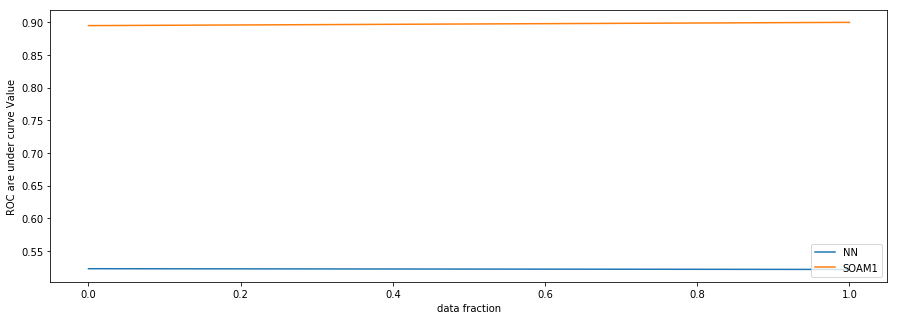

In [34]:
##output comparitive visualization
from matplotlib.pyplot import figure
plt.figure(figsize=(12, 5))
plt.plot(ROC_list_NN,label='NN')
plt.plot(ROC_list_SOAM,label='SOAM1')
plt.legend(loc='lower right')
plt.xlabel("data fraction")
plt.ylabel("ROC are under curve Value")